参考资料：<br>
白话word2vec：https://zhuanlan.zhihu.com/p/81032021 <br>
什么是词向量？https://blog.csdn.net/mawenqi0729/article/details/80698350 <br>
官方参数解读：https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.html#gensim.models.Word2Vec <br>
为什么PCA：https://zhuanlan.zhihu.com/p/37810506 <br>
https://blog.csdn.net/HLBoy_happy/article/details/77146012 <br>
参数解读博客版：https://blog.csdn.net/xiaoQL520/article/details/102509477 <br>
负采样：https://zhuanlan.zhihu.com/p/144146838 <br>
更多资料：https://zhuanlan.zhihu.com/p/26306795 <br>
https://mp.weixin.qq.com/s/j8JPMZSPoVT_hQswX5QVxA

In [64]:
import jieba
import re
import numpy as np
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib

## 分词

In [65]:
f = open("sanguo.txt", 'r',encoding='utf-8') #读入文本
lines = []
for line in f: #分别对每段分词
    temp = jieba.lcut(line)  #结巴分词 精确模式
    words = []
    for i in temp:
        #过滤掉所有的标点符号
        i = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+", "", i)
        if len(i) > 0:
            words.append(i)
    if len(words) > 0:
        lines.append(words)
print(lines[0:5])#预览前5行分词结果

[['三国演义', '上卷'], ['罗贯中'], ['滚滚', '长江', '东', '逝水', '浪花', '淘尽', '英雄', '是非成败', '转头', '空', '青山', '依旧', '在', '几度', '夕阳红'], ['白发', '渔樵', '江渚上', '惯看', '秋月春风', '一壶', '浊酒', '喜相逢', '古今', '多少', '事', '都', '付笑谈', '中'], ['--', '调寄', '临江仙']]


## 模型训练 

In [158]:
# 调用Word2Vec训练
# 参数：size: 词向量维度；window: 上下文的宽度，min_count为考虑计算的单词的最低词频阈值
model = Word2Vec(lines,vector_size = 20, window = 2 , min_count = 3, epochs=7, negative=10,sg=1)
print("孔明的词向量：\n",model.wv.get_vector('孔明'))
print("\n和孔明相关性最高的前20个词语：")
model.wv.most_similar('孔明', topn = 20)# 与孔明最相关的前20个词语

孔明的词向量：
 [-0.28052813  0.26389143  1.3741382   0.5670586   1.1045824  -1.0340751
  0.5989062   1.725876   -0.5697866   0.3285451   0.00793537  0.03969758
  1.1798524  -1.1128042   1.5626785   0.8022254   1.558103   -0.07989526
 -1.6081852  -0.8791157 ]

和孔明相关性最高的前20个词语：


[('关公', 0.9550743699073792),
 ('先主', 0.9413766264915466),
 ('周瑜', 0.9311743378639221),
 ('孙权', 0.9282431602478027),
 ('玄德', 0.9265339374542236),
 ('云长', 0.9116875529289246),
 ('曹操', 0.906761884689331),
 ('袁绍', 0.8969143629074097),
 ('马超', 0.8895545601844788),
 ('吕布', 0.8826950192451477),
 ('姜维', 0.8807435631752014),
 ('孟获', 0.8776955604553223),
 ('司马懿', 0.8747521638870239),
 ('后主', 0.8736281394958496),
 ('钟会', 0.8607128262519836),
 ('成都', 0.8590068817138672),
 ('刘璋', 0.8542147874832153),
 ('鲁肃', 0.8506062030792236),
 ('刘表', 0.8479320406913757),
 ('荆州', 0.8449496626853943)]

## 可视化 

In [159]:
# 将词向量投影到二维空间
rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.index_to_key): #index_to_key 序号,词语
    rawWordVec.append(model.wv[w]) #词向量
    word2ind[w] = i #{词语:序号}
rawWordVec = np.array(rawWordVec)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec) 

In [160]:
rawWordVec #降维之前20维

array([[ 0.38792312, -0.54152995, -0.01828705, ..., -2.4452198 ,
        -2.7130158 , -3.235616  ],
       [-0.23875876,  1.1614102 ,  1.2670172 , ..., -1.9309891 ,
        -1.8250517 , -1.6271532 ],
       [-0.0045519 ,  0.27930543, -0.54566294, ..., -2.121862  ,
        -1.6498026 , -0.91657156],
       ...,
       [-0.02792994,  0.16719927, -0.02985814, ..., -0.27670178,
        -0.36175802, -0.20433824],
       [-0.08607367,  0.08994728, -0.06444101, ..., -0.21681541,
        -0.24546817, -0.15814976],
       [-0.0786759 ,  0.13400441, -0.04889284, ..., -0.19481666,
        -0.34143034, -0.14162342]], dtype=float32)

In [161]:
X_reduced #降维之后2维

array([[ 1.9448035 ,  4.0850177 ],
       [ 1.8073775 ,  2.318491  ],
       [ 1.8222729 ,  2.9826987 ],
       ...,
       [-0.48200932,  0.03144404],
       [-0.7721189 , -0.01933354],
       [-0.662262  ,  0.00484974]], dtype=float32)

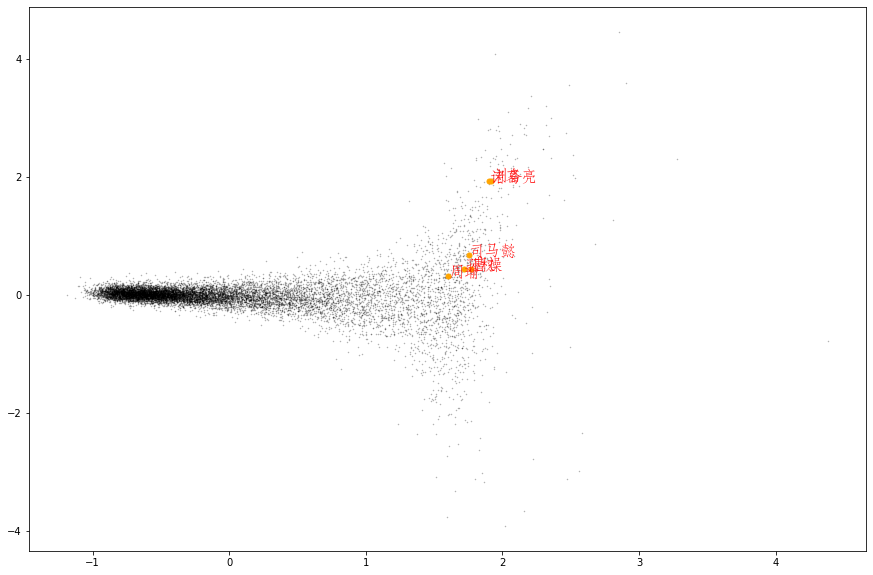

In [162]:
# 绘制星空图
# 绘制所有单词向量的二维空间投影
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.3, color = 'black')


# 绘制几个特殊单词的向量
words = ['孙权', '刘备', '曹操', '周瑜', '诸葛亮', '司马懿','汉献帝']

# 设置中文字体 否则乱码
zhfont1 = matplotlib.font_manager.FontProperties(fname='./华文仿宋.ttf', size=16)
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'orange',markersize=10)
        plt.text(xy[0], xy[1], w, fontproperties = zhfont1, alpha = 1, color = 'red')

## 类比关系实验

In [163]:
# 玄德－孔明＝？－曹操
words = model.wv.most_similar(positive=['玄德', '曹操'], negative=['孔明'])
words

[('司马懿', 0.896717369556427),
 ('周瑜', 0.8766887187957764),
 ('孟获', 0.8697741031646729),
 ('马超', 0.8657938838005066),
 ('吕布', 0.8624336123466492),
 ('孙权', 0.8613234162330627),
 ('姜维', 0.8608421087265015),
 ('袁绍', 0.8471964597702026),
 ('魏延', 0.829258918762207),
 ('钟会', 0.8280872702598572)]

In [164]:
# 曹操－魏＝？－蜀
words = model.wv.most_similar(positive=['曹操', '蜀'], negative=['魏'])
words

[('玄德', 0.643948495388031),
 ('司马懿', 0.6239533424377441),
 ('周瑜', 0.6017313003540039),
 ('孙权', 0.5897544026374817),
 ('黄忠', 0.5886633992195129),
 ('魏延', 0.5878092646598816),
 ('徐晃领', 0.5841192603111267),
 ('马超', 0.5796191692352295),
 ('孔明', 0.5754334926605225),
 ('张飞', 0.5729295611381531)]